# Imports and variables

In [2]:
import pickle
import numpy as np
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from src.results import get_panel_data, get_best_scores_table, get_scores_skills_table, get_pi_coverage_table

In [46]:
ens_method = "rand_init"
ens_method_ls = [
    "rand_init",
    "bagging",
    "batchensemble",
    "bayesian",
    "mc_dropout",
    "variational_dropout",
    "concrete_dropout",
]
ens_method_labels = {
    "rand_init": "Naive",
    "bagging": "Bagging",
    "batchensemble": "BatchEns.",
    "bayesian": "Bayesian",
    "mc_dropout": "MC Dropout",
    "variational_dropout": "Var. Drop.",
    "concrete_dropout": "Conc. Drop.",
}
dataset_ls = [
    "boston",
    "concrete",
    "energy",
    "kin8nm",
    "naval",
    "power",
    "protein",
    "wine",
    "yacht",
]
dataset_labels = {
    "boston": "Boston Housing \n (N=506)",
    "concrete": "Concrete Strength \n (N=1030)",
    "energy": "Energy Efficiency \n (N=768)",
    "kin8nm": "Kin8nm \n (N=8192)",
    "naval": "Naval Propulsion \n (N=11934)",
    "power": "Power Plant \n (N=9568)",
    "protein": "Protein Structure \n (N=45730)",
    "wine": "Red Wine Quality \n (N=1599)",
    "yacht": "Yacht Hydrodynamics \n (N=308)"
}
agg_labels = {
    "ens": "ENS",
    "lp": r"$LP$",
    "vi": r"$V_0^=$",
    "vi-a": r"$V_a^=$",
    "vi-w": r"$V_0^w$",
    "vi-aw": r"$V_a^w$",
}

In [4]:
# Get colors
agg_cols = sns.color_palette("Dark2", 8, as_cmap=True)
# Colors of aggregation methods
agg_col = {
    "lp": agg_cols.colors[4],  # type: ignore
    "vi": agg_cols.colors[5],  # type: ignore
    "vi-a": agg_cols.colors[2],  # type: ignore
    "vi-w": agg_cols.colors[0],  # type: ignore
    "vi-aw": agg_cols.colors[3],  # type: ignore
    "ens": agg_cols.colors[7],  # type: ignore
    "opt": agg_cols.colors[1],  # type: ignore
}

greens = sns.color_palette("Greens", 2, as_cmap=False)
blues = sns.color_palette("Blues", 1)
purples = sns.color_palette("Purples", 1)
reds = sns.color_palette("Reds", 3)
ens_col = {
    "rand_init": greens[1], #multi_model_cols.colors[0],  # type: ignore
    "bagging": greens[0], #multi_model_cols.colors[1],  # type: ignore
    "batchensemble": blues[0], #multi_model_cols.colors[3],  # type: ignore
    "bayesian": purples[0], #multi_model_cols.colors[8],  # type: ignore
    "mc_dropout": reds[2], #dropout_cols.colors[14],  # type: ignore
    "variational_dropout": reds[1], #dropout_cols.colors[16],  # type: ignore
    "concrete_dropout": reds[0], #dropout_cols.colors[15],  # type: ignore
}

# KIT colors
kit_cols_dict = {
    "green": "#00876C",
    "blue": "#4664AA",
    "black": "#000000",
    "grey": "#404040",
}

In [5]:
score_vec = ["crps", "crpss", "me", "lgt", "cov", "a", "w"]
nn_vec = ["drn", "bqn"]
n_ens_vec = np.arange(start=2, stop=10 + 2, step=2)
agg_meths = ["lp", "vi", "vi-a", "vi-w", "vi-aw"]

In [6]:
export = True
save_dir = os.path.join("plots", "results")

# Get data

In [7]:
data_path = os.path.join("..", "..", "04_Experiments", f"Normal")
df = get_pi_coverage_table(data_path, dataset_ls, score_vec, nn_vec, n_ens_vec, agg_meths, ens_method_ls)

c:\Users\koehl\Documents\Studium\22-23 WS\Masterarbeit\02_Repos\agg_distr_deep_ens\src\results.py:452: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["ens_method"] = ens_method
c:\Users\koehl\Documents\Studium\22-23 WS\Masterarbeit\02_Repos\agg_distr_deep_ens\src\results.py:452: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["ens_method"] = ens_method
c:\Users\koehl\Documents\Studium\22-23 WS\Masterarbeit\02_Repos\agg_distr_deep_ens\src\results.py:452: SettingWithCopyWarning: 
A value is try

In [8]:
df[(df["agg"] == "lp") & (df["dataset"] == "boston") & (df["nn"] == "drn") & (df["metric"] == "cov")]

,dataset,nn,metric,n_ens,agg,score,ens_method
72,boston,drn,cov,2,lp,89.215686,rand_init
79,boston,drn,cov,4,lp,89.117647,rand_init
86,boston,drn,cov,6,lp,88.529412,rand_init
93,boston,drn,cov,8,lp,89.019608,rand_init
100,boston,drn,cov,10,lp,89.117647,rand_init
1332,boston,drn,cov,2,lp,88.627451,bagging
1339,boston,drn,cov,4,lp,89.313725,bagging
1346,boston,drn,cov,6,lp,89.117647,bagging
1353,boston,drn,cov,8,lp,89.705882,bagging
1360,boston,drn,cov,10,lp,88.921569,bagging


# Final plots

## Lineplot - Plot PI length and coverage

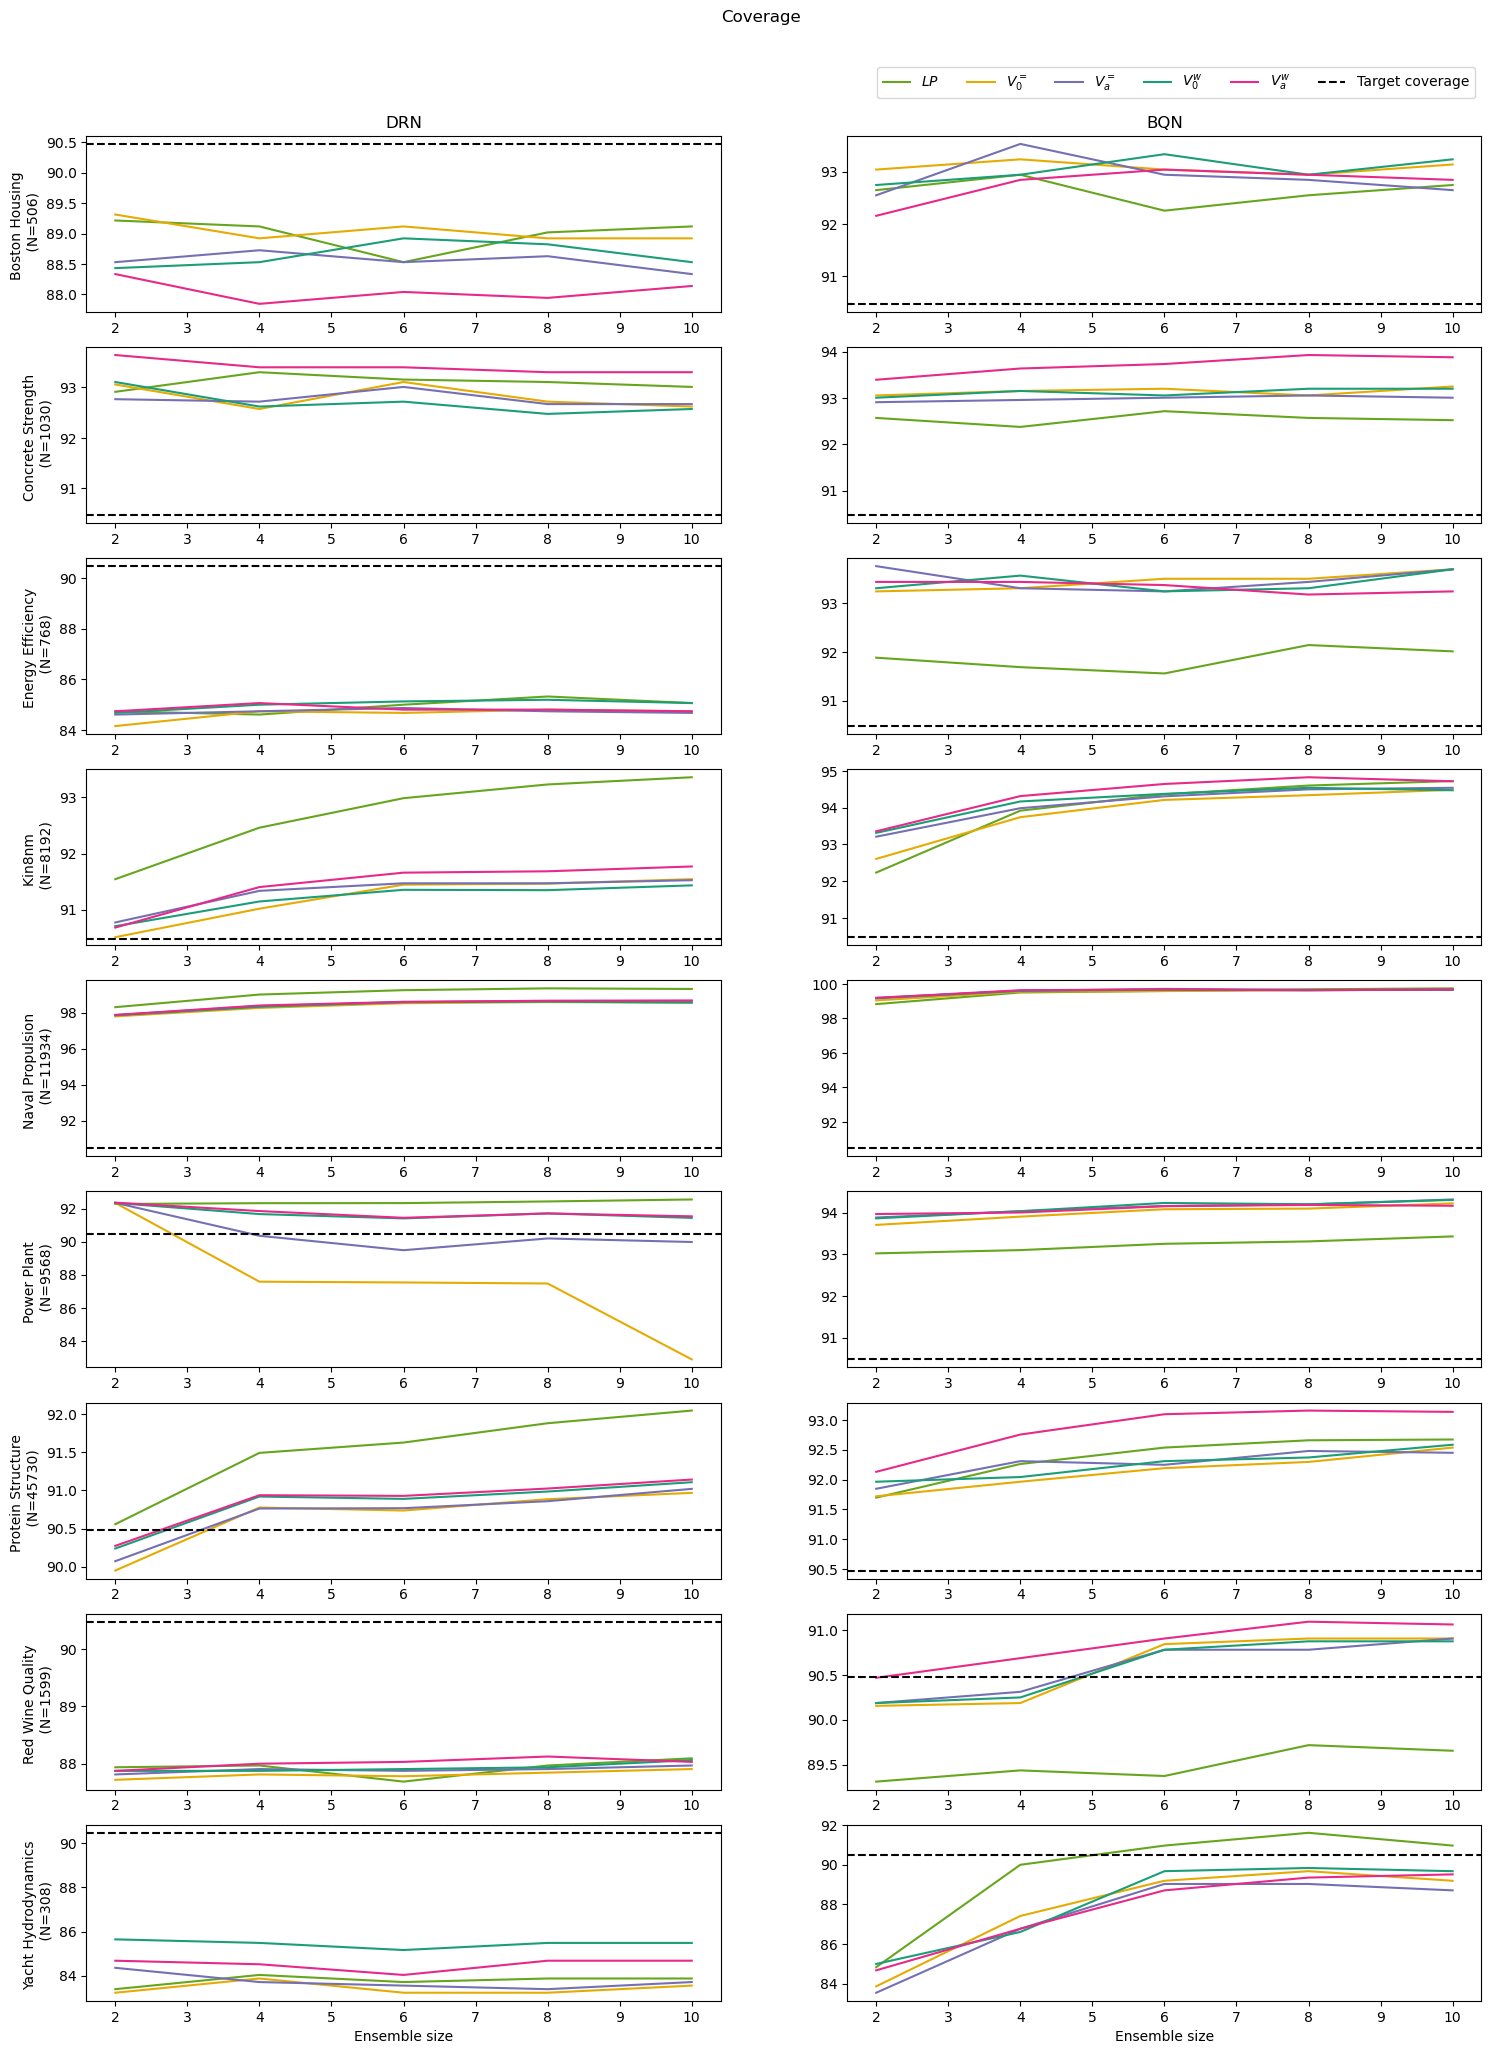

In [9]:
##### Scores - Barplot - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(18,18*1.4), squeeze=False)

# Filter out ensemble mean and optimal score
df_no_ens = df[(df["agg"] != "ens") & (df["agg"] != "opt") & (df["metric"] == "cov") & (df["ens_method"] == "rand_init")]

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    # df_nn = pd.melt(df_scores[i_nn].reset_index(), id_vars="dataset", var_name="ens_method", value_vars=tables_rel[i_nn].columns, value_name="score")
    df_nn = df_no_ens[df_no_ens["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[df_nn["dataset"] == dataset]
        
        # Plot boxplots
        g = sns.lineplot(data=df_nn_dataset, x="n_ens", y="score", hue="agg", ax=axs[i_dataset][i_nn], palette=agg_col, errorbar=None)
        
        # Add 0 line
        g.axhline((100 * 19 / 21), linestyle="--", color=kit_cols_dict["black"])
        # Add labels to x and y axis
        axs[i_dataset][i_nn].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        # axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])
        axs[i_dataset][i_nn].set_xlabel("")
        axs[len(dataset_ls)-1][i_nn].set_xlabel("Ensemble size")
        

# Set y axis range
# upper_limit = np.Inf
# for ax_drn, ax_bqn in axs:
#     drn_l, drn_u = ax_drn.get_ylim()
#     bqn_l, bqn_u = ax_bqn.get_ylim()
#     drn_range = drn_u - drn_l
#     bqn_range = bqn_u - bqn_l

#     ax_drn.set_ylim(0, min(upper_limit, max(drn_u, bqn_u)))
#     ax_bqn.set_ylim(0, min(upper_limit, max(drn_u, bqn_u)))
    

# Merge subplot legends and display figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)
axhline = matplotlib.lines.Line2D([0], [0], linestyle="dashed", color=kit_cols_dict["black"])  # type: ignore
handles.append(axhline)
labels = [agg_labels.get(agg) for agg in labels]
labels.append("Target coverage")

# Set titles and legends
axs[0][0].set_title("DRN")
axs[0][1].set_title("BQN")
fig.subplots_adjust(top=0.85)
fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.88), ncol=len(agg_meths)+1)
fig.suptitle(f"Coverage", y=0.9)

# Save figure
if export:
    filename=os.path.join(save_dir, "04_coverage.pdf")
    fig.savefig(filename, bbox_inches='tight')
    filename=os.path.join(save_dir, "04_coverage.png")
    fig.savefig(filename, bbox_inches='tight')

C:\Users\koehl\AppData\Local\Temp\ipykernel_1272\4032609465.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])
C:\Users\koehl\AppData\Local\Temp\ipykernel_1272\4032609465.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])
C:\Users\koehl\AppData\Local\Temp\ipykernel_1272\4032609465.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])
C:\Users\koehl\AppData\Local\Temp\ipykernel_1272\4032609465.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_meth

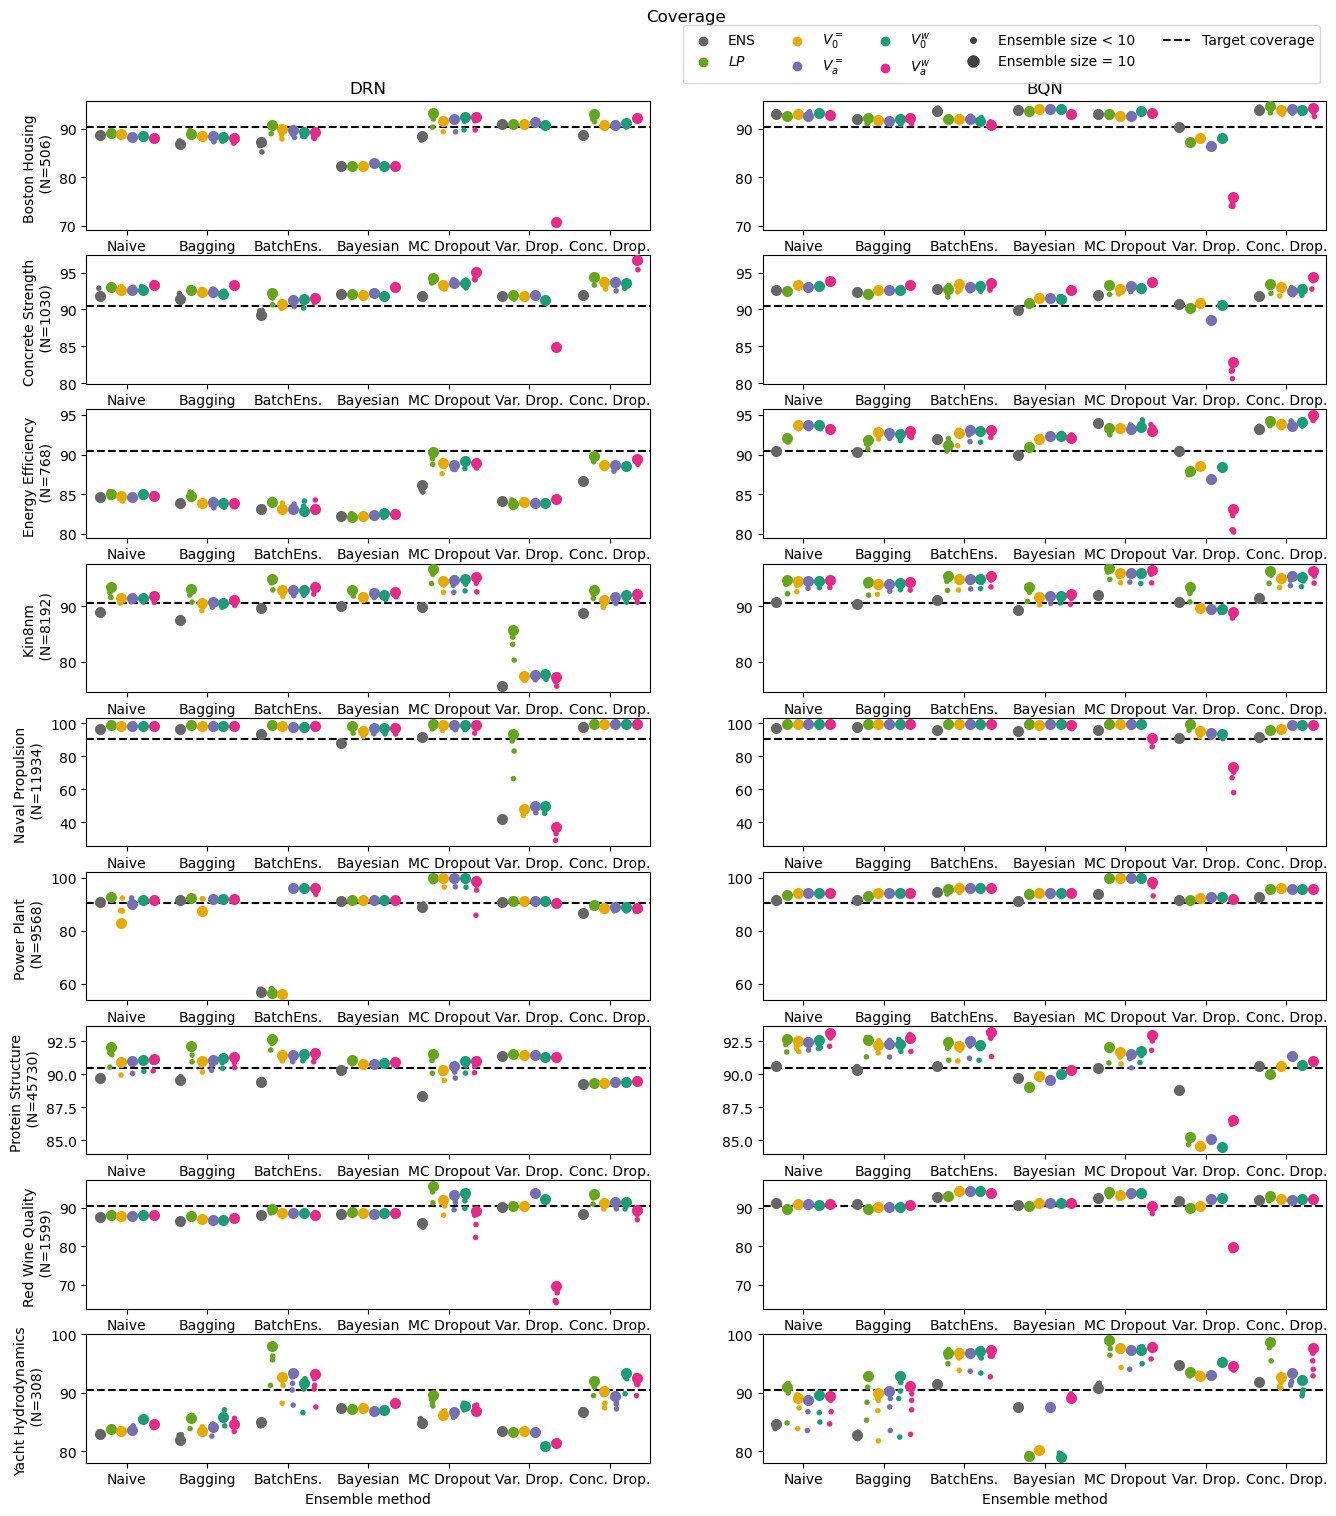

In [54]:
##### Scores - Barplot - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(16,16*1.15), squeeze=False)

# Filter out ensemble mean and optimal score
df_no_ens = df[(df["agg"] != "ens") & (df["agg"] != "opt") & (df["metric"] == "cov")]
df_no_ens = df[(df["agg"] != "opt") & (df["metric"] == "cov")]

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    # df_nn = pd.melt(df_scores[i_nn].reset_index(), id_vars="dataset", var_name="ens_method", value_vars=tables_rel[i_nn].columns, value_name="score")
    df_nn = df_no_ens[df_no_ens["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[df_nn["dataset"] == dataset]
        
        
        # Plot boxplots
        g = sns.stripplot(data=df_nn_dataset, x="ens_method", y="score", hue="agg", ax=axs[i_dataset][i_nn], palette=agg_col, dodge=True, s=4, facecolor="none")
        sns.stripplot(data=df_nn_dataset[df_nn_dataset["n_ens"] == 10], x="ens_method", y="score", hue="agg", ax=axs[i_dataset][i_nn], palette=agg_col, dodge=True, s=8)
        
        # Add 0 line
        g.axhline((100 * 19 / 21), linestyle="--", color=kit_cols_dict["black"])
        # Add labels to x and y axis
        axs[i_dataset][i_nn].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])
        axs[i_dataset][i_nn].set_xlabel("")
        axs[len(dataset_ls)-1][i_nn].set_xlabel("Ensemble method")
        

# Set y axis range
# upper_limit = np.Inf
for ax_drn, ax_bqn in axs:
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()

    ax_drn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    ax_bqn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    

# Merge subplot legends and display figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)
axhline = matplotlib.lines.Line2D([0], [0], linestyle="dashed", color=kit_cols_dict["black"])  # type: ignore
small_marker = matplotlib.lines.Line2D([0], [0], color=kit_cols_dict["grey"], marker="o", linestyle="none", markersize=4)  # type: ignore
big_marker = matplotlib.lines.Line2D([0], [0], color=kit_cols_dict["grey"], marker="o", linestyle="none", markersize=8)  # type: ignore
handles.append(small_marker)
handles.append(big_marker)
handles.append(axhline)
labels = [agg_labels.get(agg) for agg in labels]
labels.append("Ensemble size < 10")
labels.append("Ensemble size = 10")
labels.append("Target coverage")

# Set titles and legends
axs[0][0].set_title("DRN")
axs[0][1].set_title("BQN")
fig.subplots_adjust(top=0.85)
fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.895), ncol=5)
fig.suptitle(f"Coverage", y=0.9)

# Save figure
if export:
    filename=os.path.join(save_dir, "04_coverage.pdf")
    fig.savefig(filename, bbox_inches='tight')
    filename=os.path.join(save_dir, "04_coverage.png")
    fig.savefig(filename, bbox_inches='tight')